In [384]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [385]:
#importing and reading through the data
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [339]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [340]:
#decription of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [341]:
#columns with null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [342]:
#the number of rows and columns 
df.shape

(10866, 21)

In [343]:
#counts of duplicated values in each columns
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

In [344]:
#the unique values in twitter enhanced archive csv information
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

## Creating a Copy of The Dataset

In [359]:
# creating a copy of the dataset
df_m = df.copy()

## Data Cleaning

#### Issue 1:  Replacing the `cast` null values with `None` and seperating their details to get the exact cast details for each movie

In [360]:
#function to replace the slashes column and null values with None
def column__replace(column):
    column = str(column).replace("|",",")
    column = column.replace('nan', 'None')
    return column

In [361]:
#replacing using the replace function
df_m['cast'] = df_m['cast'].apply(column__replace)

#### Issue 2:  Replacing the `keywords` null values with `None` and seperating their details to get the exact keywords 

In [362]:
#replacing using the replace function
df_m['keywords'] = df_m['keywords'].apply(column__replace)

#### Issue 3:  Replacing the `genres` null values with `None` and seperating their details to get the exact genres

In [363]:
#replacing using the replace function
df_m['genres'] = df_m['genres'].apply(column__replace)

#### Issue 4:  Replacing the `production_companies` null values with `None` and seperating their details to get the exact production_companies

In [364]:
#replacing using the replace function
df_m['production_companies'] = df_m['production_companies'].apply(column__replace)

#### Issue 5: Replacing the directors Nan values with `None`

In [365]:
df_m['director'] = df_m['director'].fillna('None')

#### Issue 6:  Normalizing the `release date` to extract the `release week day`

In [366]:
df_m['release_date_of_week'] = pd.to_datetime(df_m.release_date).dt.day_name()

### Dropping Columns
Unnecessary would be dropped off.

In [367]:
#dropping the columns
df_m.drop(['id','imdb_id', 'homepage', 'tagline', 'overview'], axis = 1, inplace = True)

### Drop Duplicates
This dataset has rows movie that are duplicates, therefore, these would be dropped.

In [368]:
#finding out number of duplicates rows
df_m.duplicated().value_counts()

False    10865
True         1
dtype: int64

In [369]:
#locating the duplicate rows
df2 = df_m.loc[df_m['popularity']== 0.59643]
df2

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_date_of_week
2089,0.59643,30000000,967000,TEKKEN,"Jon Foo,Kelly Overton,Cary-Hiroyuki Tagawa,Ian...",Dwight H. Little,"martial arts,dystopia,based on video game,mart...",92,"Crime,Drama,Action,Thriller,Science Fiction","Namco,Light Song Films",3/20/10,110,5.0,2010,30000000.0,967000.0,Saturday
2090,0.59643,30000000,967000,TEKKEN,"Jon Foo,Kelly Overton,Cary-Hiroyuki Tagawa,Ian...",Dwight H. Little,"martial arts,dystopia,based on video game,mart...",92,"Crime,Drama,Action,Thriller,Science Fiction","Namco,Light Song Films",3/20/10,110,5.0,2010,30000000.0,967000.0,Saturday


In [370]:
#dropping duplicates
df_m.drop_duplicates(inplace=True)

## Exporting the Cleaned Data to a New CSV

In [371]:
#exporting the data to a new csv file
df_movies = df_m.to_csv('cleaned_tmdb-movies.csv', index = False)

## Exploratory Data Analysis

In [391]:
df_movies = pd.read_csv('cleaned_tmdb-movies.csv')
df_movies.head(2)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_date_of_week
0,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,"monster,dna,tyrannosaurus rex,velociraptor,island",124,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Tuesday
1,28.419936,150000000,378436354,Mad Max: Fury Road,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",George Miller,"future,chase,post-apocalyptic,dystopia,australia",120,"Action,Adventure,Science Fiction,Thriller","Village Roadshow Pictures,Kennedy Miller Produ...",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Wednesday


### <span style='color:#191970'> Question 1. What are top 20 movies based on their popularity?

In [399]:
#ordering the movies in descending order
df_movies_t = df_movies.groupby('original_title')['popularity'].sum()
df_movies_tt= df_movies_t.sort_values(ascending=False).reset_index()
df_movies_title = df_movies_tt.head(20)
df_movies_title

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
2,Interstellar,24.949134
3,Guardians of the Galaxy,14.311205
4,Insurgent,13.112507
5,Captain America: The Winter Soldier,12.971027
6,Star Wars,12.037933
7,John Wick,11.422751
8,Star Wars: The Force Awakens,11.173104
9,The Hunger Games: Mockingjay - Part 1,10.739009


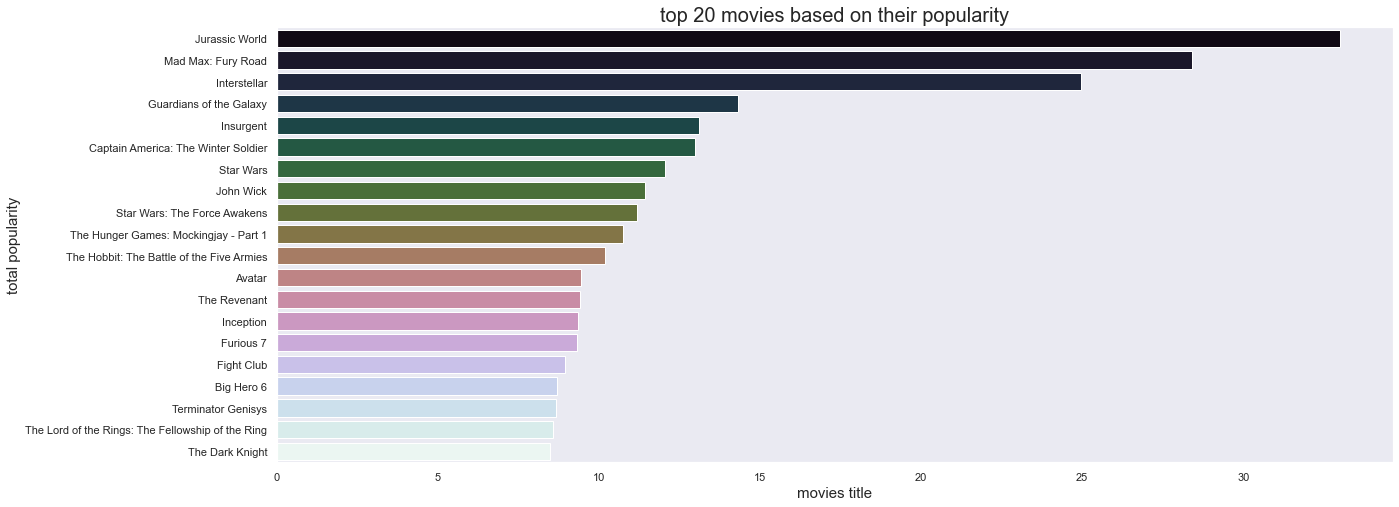

In [416]:
#plotting the chart to display the analysis
plt.figure(figsize=(20,8))
ax = sns.barplot(data =df_movies_title, y='original_title', x='popularity', palette='cubehelix')

#setting the properties for the chart
sns.set_theme(style="darkgrid")
ax.grid(False)
ax.set_title('top 20 movies based on their popularity', fontsize =20)
ax.set_xlabel('movies title', fontsize = 15)
ax.set_ylabel('total popularity', fontsize = 15)

#saving the chart
plt.show()